In [49]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from Database import COMP_DB, check_sanity
from Flash import Stream, UOP, Q_Flash, PENG_ROBINSON

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
print(COMP_DB)

{'critical':              omega          bp            pc          tc       vc          mw
component                                                                    
benzene    0.21500  353.229014  4.924389e+06  562.088022  0.25999   78.110001
toluene    0.25960  383.789011  4.100039e+06  591.789011  0.31600   92.140800
o-xylene   0.30230  417.565012  3.732809e+06  630.362009  0.36912  106.166000
m-xylene   0.32600  412.255015  3.541119e+06  617.039011  0.37573  106.166000
p-xylene   0.32589  411.500010  3.510789e+06  616.250010  0.37906  106.166000
...            ...         ...           ...         ...      ...         ...
n-c15      0.70599  543.758005  1.516810e+06  706.990000  0.87998  212.410004
n-c14      0.67900  526.648020  1.620180e+06  693.990000  0.82999  198.380005
n-c13      0.62300  508.569010  1.723530e+06  675.789011  0.77999  184.367004
n-c12      0.56199  489.418009  1.829920e+06  658.289011  0.71297  170.339005
n-c11      0.53500  469.030009  1.964930e+06  638.2

In [51]:

# Component in Scope for the calculation
comp1= {'benzene': 0.5,
      'toluene': 0.5}
comp2= {'methane':0.2,
        'n-butane': 0.2,
      'n-pentane': 0.2,
      'n-hexane': 0.2,
      'n-c15':0.2}
# check for consistency of the component list
check_sanity(comp1)
check_sanity(comp2)
    


Sanity check completed successfully.
Sanity check completed successfully.


In [52]:
# create a stream from the component list
s1 = Stream(composition=comp1, temperature=273+94, pressure=101325)
s2 = Stream(composition=comp2, temperature=400, pressure=101325)

In [53]:
# Wrap the streams with EOS solver
s1 = PENG_ROBINSON(s1)
s2 = PENG_ROBINSON(s2)

##### Parameters Calculation:
Temperature: 367, Pressure: 101325
Tr: [0.65292265 0.62015346], alpha: [1.28408468 1.34751617], a: [2.60383955 3.63784361], b: [7.38314817e-05 9.33616470e-05]
#####
Two phase
Calculated beta:0.426987871539877
Willson: xi:[0.40988763 0.59011237], yi:[0.62092962 0.37907038], K: [1.5148777  0.64236982], beta:0.426987871539877
A: 0.0347438377842787, B: 0.0028345034754347497, a_mix: 3.1923709129273767, b_mix: 8.535647387494276e-05
Z roots: [0.96722709 0.02639675 0.00354166]
##### Z-factor Calculation:
Z_l: 0.0035416564849199516, Z_v: 0.9672270883412512
#####
##### Fugacity Coefficient Calculation:
Z: 0.0035416564849199516, x_or_y: [0.40988763 0.59011237], A: 0.0347438377842787, B: 0.0028345034754347497, a_mix: 3.1923709129273767, b_mix: 8.535647387494276e-05
ln_phi: [ 0.3637593  -0.50588328]
phi: [1.43872786 0.60297275]
#####
A: 0.03237521650101783, B: 0.0026976312481526966, a_mix: 2.974734688185266, b_mix: 8.123478879201517e-05
Z roots: [0.9695837  0.02432503 

In [54]:
# get the simple flash result
print('Stream s1')
s1.print_basic()

print('Stream s2')
s2.print_basic()


Stream s1
### Post Flash Results for Stream:###
T:, 367 K, P: 101325 Pa
VF: 0.29, xi: [0.44 0.56], yi: [0.65 0.35]
Z_l: 0.0035, Z_v: 0.9699, phi_l: [1.44 0.6 ], phi_v: [0.97 0.96]
h_l: -32335.11 J/mol, h_v: -145.2 J/mol, h: -23155.13 J/mol
###
Stream s2
### Post Flash Results for Stream:###
T:, 400 K, P: 101325 Pa
VF: 0.79, xi: [0.   0.01 0.03 0.05 0.91], yi: [0.25 0.25 0.25 0.24 0.01]
Z_l: 0.0099, Z_v: 0.9877, phi_l: [2.7512e+02 1.9950e+01 9.2900e+00 4.4000e+00 1.0000e-02], phi_v: [1.01 0.99 0.98 0.98 0.93]
h_l: -59496.45 J/mol, h_v: 319.16 J/mol, h: -12376.59 J/mol
###


Bubble point of s1
##### Parameters Calculation:
Temperature: 273.0, Pressure: 101325
Tr: [0.48568905 0.46131306], alpha: [1.46474282 1.54452125], a: [2.97017428 4.16969154], b: [7.38314817e-05 9.33616470e-05]
#####
A: 0.0711150165347217, B: 0.0037840153110112753, a_mix: 3.6156804195721843, b_mix: 8.476351147040844e-05
Z roots: [0.92808707 0.0638289  0.00430001]
##### Z-factor Calculation:
Z_l: 0.004300010117351156, Z_v: 0.9280870701785846
#####
##### Fugacity Coefficient Calculation:
Z: 0.004300010117351156, x_or_y: [0.44024899 0.55975101], A: 0.0711150165347217, B: 0.0037840153110112753, a_mix: 3.6156804195721843, b_mix: 8.476351147040844e-05
ln_phi: [-3.25925099 -4.59794363]
phi: [0.03841716 0.01007253]
#####
A: 0.06621092533725242, B: 0.0036013429306458213, a_mix: 3.3663431152655963, b_mix: 8.067157443110087e-05
Z roots: [0.93348629 0.05880572 0.00410665]
##### Z-factor Calculation:
Z_l: 0.004106650983842411, Z_v: 0.9334862856775755
#####
##### Fugacity Coefficient Calculation:
Z: 

e:\83 PhD IITD\CLL761\2_Assignments\CLL_761TermProject_Flash\code\Flash.py:226: RuntimeWarning: invalid value encountered in log
  term2 = ((T * da_mix_dT - a_mix) / (2 * np.sqrt(2) * b_mix)) * np.log((Z + (1 + np.sqrt(2)) * B) / (Z + (1 - np.sqrt(2)) * B))


##### Fugacity Coefficient Calculation:
Z: 0.0, x_or_y: [0. 0.], A: 0.0, B: 0.0, a_mix: 0.0, b_mix: 0.0
ln_phi: [-738291.79116731 -933593.44381535]
phi: [0. 0.]
#####
A: 0.01951820985722249, B: 0.0022400473762607953, a_mix: 2.7543494962394828, b_mix: 8.359656433422601e-05
Z roots: [0.98250954 0.01195676 0.00329366]
##### Z-factor Calculation:
Z_l: 0.0032936565288333225, Z_v: 0.9825095355402513
#####
##### Fugacity Coefficient Calculation:
Z: 0.9825095355402513, x_or_y: [0.5, 0.5], A: 0.01951820985722249, B: 0.0022400473762607953, a_mix: 2.7543494962394828, b_mix: 8.359656433422601e-05
ln_phi: [-0.01439252 -0.020374  ]
phi: [0.98571056 0.97983215]
#####
##### K-value Calculation:
phi_l:[0. 0.], phi_v:[0.98571056 0.97983215]
K:[0. 0.]
#####
####fugacity balance:
Vapor fugacity: [0.49285528 0.48991608]
Liquid fugacity: [0. 0.]
####
Single phase: Liquid
Single phase: Liquid
##### Residual Enthalpy Calculation:
Term1: -3781.358363636364, Term2: nan
Residual Enthalpy: nan J/mol
#####
##### I

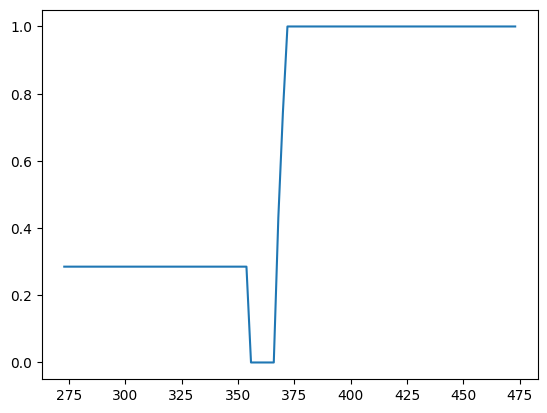

In [59]:
from UnitOperation import Heater 
# get bubble point of s1 and dew point of s2
print('Bubble point of s1')
# s1_tb = Heater(s1, dP=0, beta=0.1).ps.T
# print(s1_tb)
from matplotlib import pyplot as plt
Tspace = np.linspace(273, 273+200,100)
vfSpace =np.array([])
for T in Tspace:
    s1.T = T
    vfSpace = np.append(vfSpace, s1.vf)

plt.plot(Tspace, vfSpace)
plt.show()

In [ ]:

s3 = Heater(s1, dQ=1000, dP=1000)[0]

##### Parameters Calculation:
Temperature: 367, Pressure: 100325
Tr: [0.65292265 0.62015346], alpha: [1.28408468 1.34751617], a: [2.60383955 3.63784361], b: [7.38314817e-05 9.33616470e-05]
#####
A: 0.03405825584507765, B: 0.002787032440035398, a_mix: 3.160569931069097, b_mix: 8.476351147040844e-05
Z roots: [0.96790123 0.02582604 0.0034857 ]
##### Z-factor Calculation:
Z_l: 0.0034857017354101238, Z_v: 0.9679012304034473
#####
##### Fugacity Coefficient Calculation:
Z: 0.0034857017354101238, x_or_y: [0.44024899 0.55975101], A: 0.03405825584507765, B: 0.002787032440035398, a_mix: 3.160569931069097, b_mix: 8.476351147040844e-05
ln_phi: [ 0.37313278 -0.49562288]
phi: [1.45227715 0.60919134]
#####
A: 0.03174189964119879, B: 0.0026524891551561024, a_mix: 2.9456145381409846, b_mix: 8.067157443110087e-05
Z roots: [0.97020234 0.02380514 0.00334003]
##### Z-factor Calculation:
Z_l: 0.003340031049401216, Z_v: 0.9702023441681099
#####
##### Fugacity Coefficient Calculation:
Z: 0.9702023441681099, x

TypeError: unsupported operand type(s) for /: 'int' and 'NoneType'